<a href="https://colab.research.google.com/github/BlocklyS/smartEDA/blob/main/smartEDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [26]:
# this line of code prints the version of R being used (in colab change runtime to R kernel)
print(R.version.string)

[1] "R version 4.3.2 (2023-10-31)"


In [ ]:
# recall tidyverse ()
library(tidyverse)

In [ ]:
# install SmartEDA
install.packages ("SmartEDA")
library(SmartEDA)

In [4]:
# Read file on a given URL
# Use read.csv function to parse the data and store in a variable named 'world_data'
world_data <- read.csv("https://raw.githubusercontent.com/BlocklyS/smartEDA/main/world-data-2023.csv") # GitHub Gist table


In [ ]:
class(world_data) #check the class of the R object

In [27]:
# Display the first few rows of a data frame (snapshot)
head(world_data,5)
# Display the last few rows of a data frame
tail(world_data,5)

,Country,Density..P.Km2.,Abbreviation,Agricultural.Land....,Land.Area.Km2.,Armed.Forces.size,Birth.Rate,Calling.Code,Capital.Major.City,Co2.Emissions,⋯,Out.of.pocket.health.expenditure,Physicians.per.thousand,Population,Population..Labor.force.participation....,Tax.revenue....,Total.tax.rate,Unemployment.rate,Urban_population,Latitude,Longitude
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
1,Afghanistan,60,AF,58.10%,"652,230","323,000",32.49,93,Kabul,"8,672",⋯,78.40%,0.28,"38,041,754",48.90%,9.30%,71.40%,11.12%,"9,797,273",33.93911,67.709953
2,Albania,105,AL,43.10%,"28,748","9,000",11.78,355,Tirana,"4,536",⋯,56.90%,1.20,"2,854,191",55.70%,18.60%,36.60%,12.33%,"1,747,593",41.15333,20.168331
3,Algeria,18,DZ,17.40%,"2,381,741","317,000",24.28,213,Algiers,"150,006",⋯,28.10%,1.72,"43,053,054",41.20%,37.20%,66.10%,11.70%,"31,510,100",28.03389,1.659626
4,Andorra,164,AD,40.00%,468,,7.20,376,Andorra la Vella,469,⋯,36.40%,3.33,"77,142",,,,,"67,873",42.50628,1.521801
5,Angola,26,AO,47.50%,"1,246,700","117,000",40.73,244,Luanda,"34,693",⋯,33.40%,0.21,"31,825,295",77.50%,9.20%,49.10%,6.89%,"21,061,025",-11.20269,17.873887


,Country,Density..P.Km2.,Abbreviation,Agricultural.Land....,Land.Area.Km2.,Armed.Forces.size,Birth.Rate,Calling.Code,Capital.Major.City,Co2.Emissions,⋯,Out.of.pocket.health.expenditure,Physicians.per.thousand,Population,Population..Labor.force.participation....,Tax.revenue....,Total.tax.rate,Unemployment.rate,Urban_population,Latitude,Longitude
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<int>,<chr>,<chr>,⋯,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
191,Venezuela,32,VE,24.50%,"912,050","343,000",17.88,58,Caracas,"164,175",⋯,45.80%,1.92,"28,515,829",59.70%,,73.30%,8.80%,"25,162,368",6.42375,-66.58973
192,Vietnam,314,VN,39.30%,"331,210","522,000",16.75,84,Hanoi,"192,668",⋯,43.50%,0.82,"96,462,106",77.40%,19.10%,37.60%,2.01%,"35,332,140",14.05832,108.27720
193,Yemen,56,YE,44.60%,"527,968","40,000",30.45,967,Sanaa,"10,609",⋯,81.00%,0.31,"29,161,922",38.00%,,26.60%,12.91%,"10,869,523",15.55273,48.51639
194,Zambia,25,ZM,32.10%,"752,618","16,000",36.19,260,Lusaka,"5,141",⋯,27.50%,1.19,"17,861,030",74.60%,16.20%,15.60%,11.43%,"7,871,713",-13.13390,27.84933
195,Zimbabwe,38,ZW,41.90%,"390,757","51,000",30.68,263,Harare,"10,983",⋯,25.80%,0.21,"14,645,468",83.10%,20.70%,31.60%,4.95%,"4,717,305",-19.01544,29.15486


In [ ]:
# give a concise representation of the R object 'dataframe' (names of the columns, the type of data in each column..)
glimpse(world_data)

** Transform the excess of character columns and clear format symbols**

In [8]:
# Identifying character columns
char_cols <- sapply(world_data, is.character)

In [9]:
# Exclude certain columns from transformation
exclude_cols <- c("Country", "Abbreviation", "Capital.Major.City", "Currency.Code", "Largest.city", "Official.language")
char_cols[exclude_cols] <- FALSE

In [10]:
# Convert remaining character columns to numeric, removing any special characters, assing to new variable clean_data
clean_data <- world_data
char_columns_to_convert <- names(clean_data)[char_cols]


clean_data[char_columns_to_convert] <- lapply(clean_data[char_columns_to_convert], function(x) {
    x <- gsub("[%,\\$]", "",x) # Remove special characters
    suppressWarnings(as.numeric(x)) # Convert to numeric and suppress warnings
})

In [28]:
str(clean_data)

Classes ‘data.table’ and 'data.frame':	195 obs. of  35 variables:
 $ Country                                  : chr  "Afghanistan" "Albania" "Algeria" "Andorra" ...
 $ Density..P.Km2.                          : num  60 105 18 164 26 223 17 104 3 109 ...
 $ Abbreviation                             : chr  "AF" "AL" "DZ" "AD" ...
 $ Agricultural.Land....                    : num  58.1 43.1 17.4 40 47.5 20.5 54.3 58.9 48.2 32.4 ...
 $ Land.Area.Km2.                           : num  652230 28748 2381741 468 1246700 ...
 $ Armed.Forces.size                        : num  323000 9000 317000 NA 117000 0 105000 49000 58000 21000 ...
 $ Birth.Rate                               : num  32.5 11.8 24.3 7.2 40.7 ...
 $ Calling.Code                             : int  93 355 213 376 244 1 54 374 61 43 ...
 $ Capital.Major.City                       : chr  "Kabul" "Tirana" "Algiers" "Andorra la Vella" ...
 $ Co2.Emissions                            : num  8672 4536 150006 469 34693 ...
 $ CPI            

**Automated Exploratory Data Analysis with SmartEDA package**

In [29]:
# Overview of the data - Type = 1: overall data summary
ExpData(data=clean_data,type=1) # Function to generate data dictionary of a dataframe
# give the dimensions of the dataset,variable names, overall missing summary and data types of each variables.


Descriptions,Value
<chr>,<chr>
Sample size (nrow),195
No. of variables (ncol),35
No. of numeric/interger variables,29
No. of factor variables,0
No. of text variables,6
No. of logical variables,0
No. of identifier variables,5
No. of date variables,0
No. of zero variance variables (uniform),0


In [30]:
# Structure of the data - Type = 2: variable level summary
ExpData(data=clean_data,type=2)

Index,Variable_Name,Variable_Type,Sample_n,Missing_Count,Per_of_Missing,No_of_distinct_values
<dbl>,<chr>,<chr>,<int>,<int>,<dbl>,<int>
1,Country,character,195,0,0.000,195
2,Density..P.Km2.,numeric,195,0,0.000,137
3,Abbreviation,character,188,7,0.036,189
4,Agricultural.Land....,numeric,188,7,0.036,168
5,Land.Area.Km2.,numeric,194,1,0.005,194
6,Armed.Forces.size,numeric,171,24,0.123,105
7,Birth.Rate,numeric,189,6,0.031,170
8,Calling.Code,integer,194,1,0.005,182
9,Capital.Major.City,character,192,3,0.015,193


In [ ]:
# Metadata Information with additional statistics like mean, median and variance
 ExpData(data=clean_data,type=2, fun = c("mean", "median", "var"))


In [31]:
# ExpNumStat provide summary statistics for all numerical variable
#case 1: target variable is not defined- group by All

ExpNumStat(clean_data,by="A",gp=NULL,Qnt=NULL,MesofShape=2, Outlier=FALSE,round=2,Nlim=10)


,Vname,Group,TN,nNeg,nZero,nPos,NegInf,PosInf,NA_Value,Per_of_Missing,sum,min,max,mean,median,SD,CV,IQR,Skewness,Kurtosis
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
2,Agricultural.Land....,All,195,0,0,188,0,0,7,3.59,7.354100e+03,0.60,8.260000e+01,3.912000e+01,3.960000e+01,2.178000e+01,0.56,3.367000e+01,0.09,-0.95
4,Armed.Forces.size,All,195,0,5,166,0,0,24,12.31,2.723600e+07,0.00,3.031000e+06,1.592749e+05,3.100000e+04,3.806288e+05,2.39,1.310000e+05,5.06,30.30
5,Birth.Rate,All,195,0,0,189,0,0,6,3.08,3.820630e+03,5.90,4.608000e+01,2.021000e+01,1.795000e+01,9.950000e+00,0.49,1.745000e+01,0.57,-0.83
6,Calling.Code,All,195,0,0,194,0,0,1,0.51,6.994600e+04,1.00,1.876000e+03,3.605500e+02,2.555000e+02,3.232400e+02,0.90,4.242500e+02,1.18,1.52
7,Co2.Emissions,All,195,0,0,188,0,0,7,3.59,3.342626e+07,11.00,9.893038e+06,1.777992e+05,1.230300e+04,8.387903e+05,4.72,6.158000e+04,9.50,100.00
8,CPI,All,195,0,0,178,0,0,17,8.72,3.390205e+04,99.03,4.583710e+03,1.904600e+02,1.253400e+02,3.979500e+02,2.09,4.338000e+01,9.25,91.38
9,CPI.Change....,All,195,15,0,164,0,0,16,8.21,1.203300e+03,-4.30,2.549000e+02,6.720000e+00,2.300000e+00,2.445000e+01,3.64,3.250000e+00,8.29,74.19
1,Density..P.Km2.,All,195,0,0,195,0,0,0,0.00,6.956900e+04,2.00,2.633700e+04,3.567600e+02,8.900000e+01,1.982890e+03,5.56,1.810000e+02,11.97,151.07
10,Fertility.Rate,All,195,0,0,188,0,0,7,3.59,5.072500e+02,0.98,6.910000e+00,2.700000e+00,2.240000e+00,1.280000e+00,0.48,1.890000e+00,0.94,-0.07


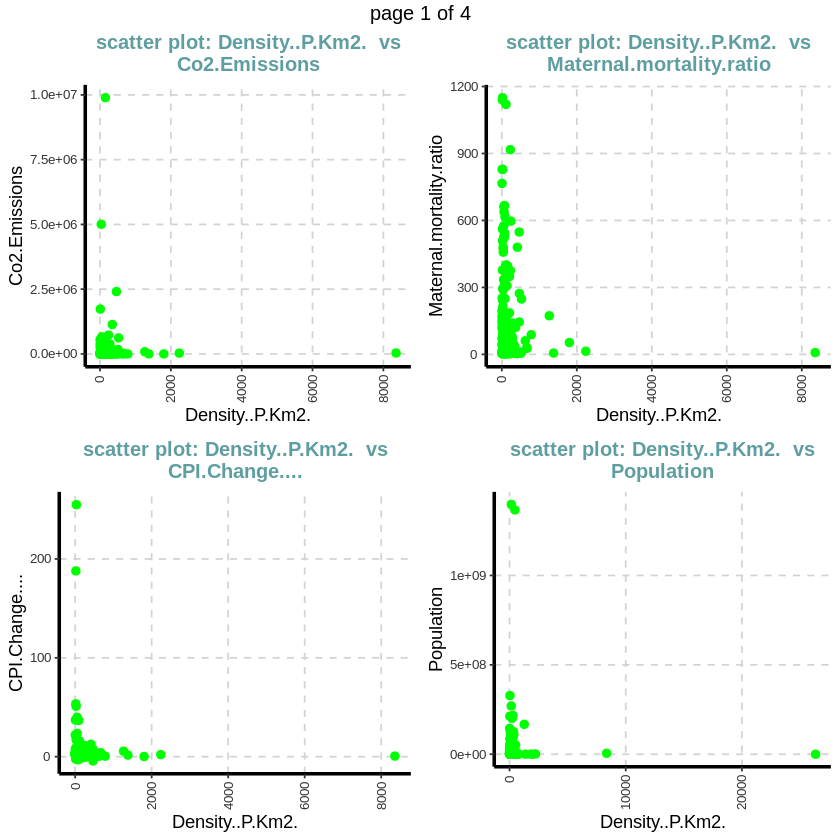

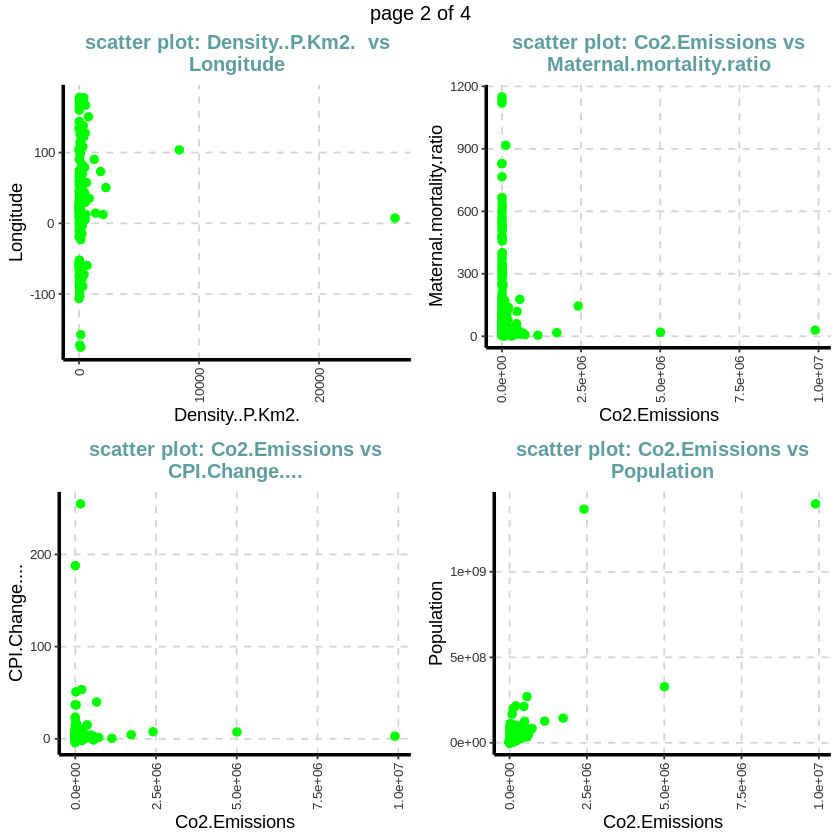

$`0`


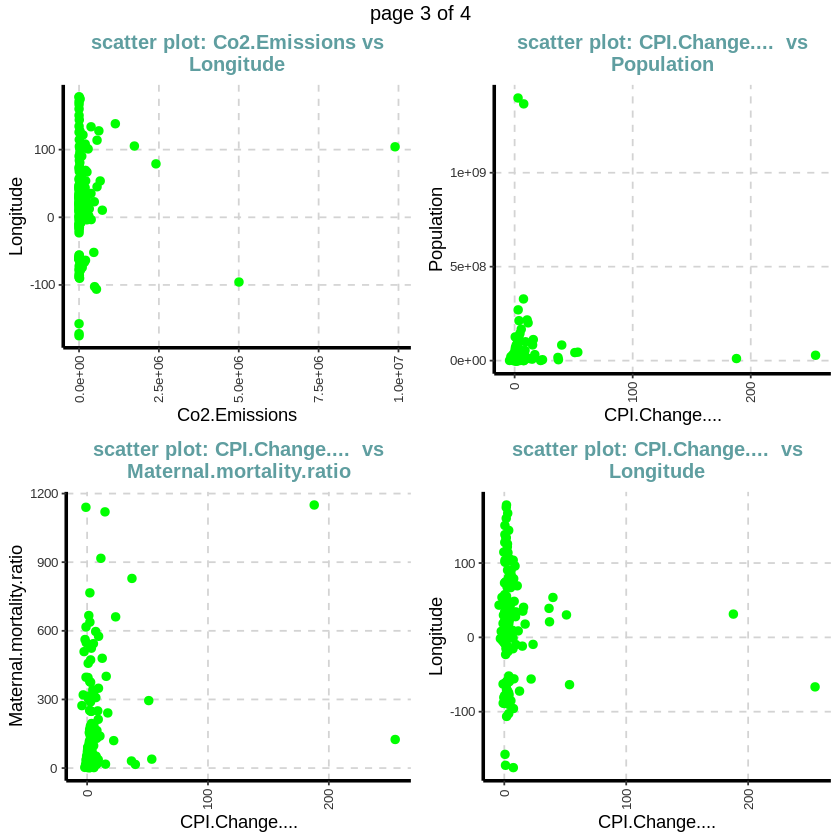

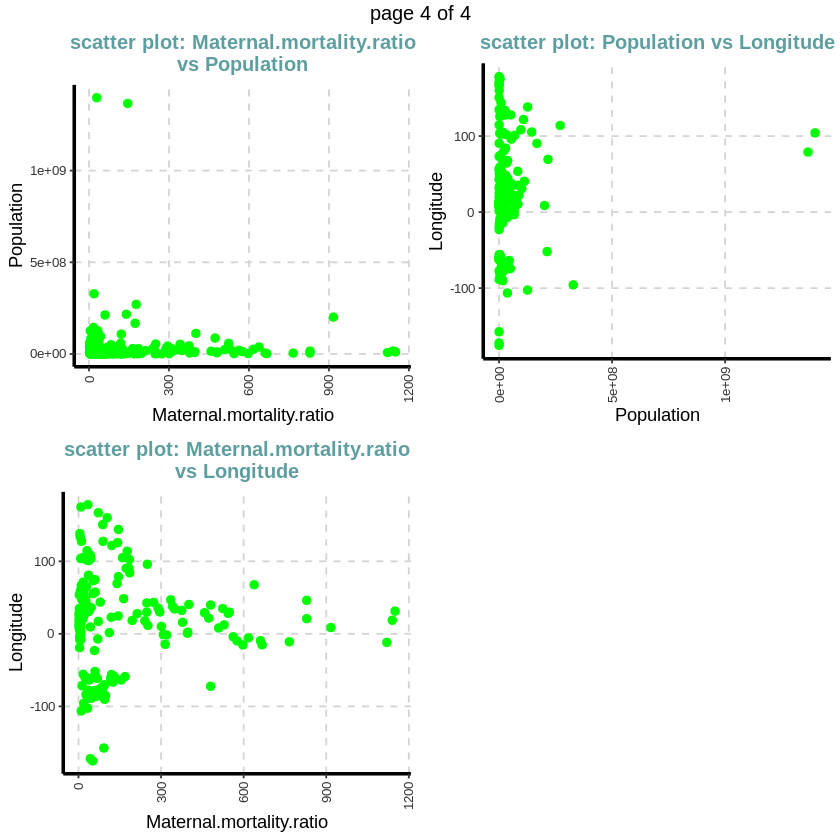

In [32]:
# This function automatically scans through each variable and creates densityplot, scatterplot and boxplot for continuous variable using ggplot2 functions

ExpNumViz( clean_data,type=2, nlim=3,col= 'green',  scatter=TRUE, gtitle="scatter plot:",theme="Default", Page=c(2,2),sample=6) # you can remove sample limit


In [33]:
options(width = 150) # customized statistics with ExpCustomStat
ExpCustomStat(clean_data,Cvar= "Country",gpby=TRUE, filt=  "Life.expectancy <60") #filtering data

Country,Filter,Count,Prop
<chr>,<chr>,<int>,<dbl>
Ivory Coast,Life.expectancy <60,1,8.33
Cameroon,Life.expectancy <60,1,8.33
Central African Republic,Life.expectancy <60,1,8.33
Chad,Life.expectancy <60,1,8.33
Equatorial Guinea,Life.expectancy <60,1,8.33
Guinea-Bissau,Life.expectancy <60,1,8.33
Lesotho,Life.expectancy <60,1,8.33
Mali,Life.expectancy <60,1,8.33
Nigeria,Life.expectancy <60,1,8.33


In [36]:
# Numeric variable summary
ExpCustomStat(clean_data,Nvar=c("Urban_population","GDP","Out.of.pocket.health.expenditure","Unemployment.rate"),stat = c('Count','mean','sum','var','min','max'))

Attribute,Count,mean,sum,var,min,max
<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Urban_population,195,2.230454e+07,4.237863e+09,5.689760e+15,5464.00,8.42934e+08
GDP,195,4.772959e+11,9.211811e+13,4.718337e+24,47271463.00,2.14277e+13
Out.of.pocket.health.expenditure,195,3.263723e+01,6.135800e+03,3.675923e+02,0.20,8.16000e+01
Unemployment.rate,195,6.886364e+00,1.212000e+03,2.579844e+01,0.09,2.81800e+01


In [35]:
ExpCustomStat(clean_data,Nvar=c("GDP","Minimum.wage"),stat = c('min','p0.25','median','p0.75','max'))


Attribute,min,p0.25,median,p0.75,max
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
GDP,47271463.00,8.45462e+09,3.438723e+10,2.34094e+11,2.14277e+13
Minimum.wage,0.01,4.02500e-01,1.045000e+00,2.44750e+00,1.35900e+01


In [37]:
ExpCustomStat(clean_data,Nvar=c("Urban_population","GDP","Out.of.pocket.health.expenditure","Unemployment.rate"),stat = c('min','p0.25','median','p0.75','max'))



Attribute,min,p0.25,median,p0.75,max
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Urban_population,5464.00,1.152961e+06,4.678104e+06,1.490324e+07,8.42934e+08
GDP,47271463.00,8.454620e+09,3.438723e+10,2.340940e+11,2.14277e+13
Out.of.pocket.health.expenditure,0.20,1.745000e+01,3.070000e+01,4.397500e+01,8.16000e+01
Unemployment.rate,0.09,3.395000e+00,5.360000e+00,9.490000e+00,2.81800e+01


[[1]]
NULL


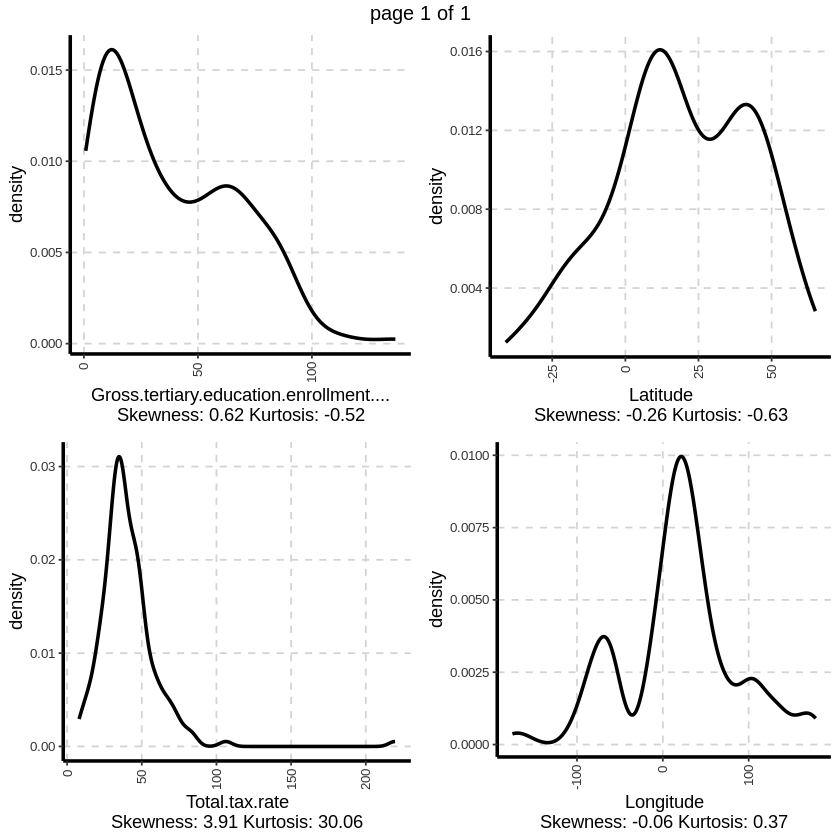

In [38]:
## graphical representation of numeric features (Density plot univariate)
# Note: Variable excluded (if unique value of variable which is less than or eaual to 10 [nlim=10])
plot1 <- ExpNumViz(clean_data,target=NULL,nlim=10,Page=c(2,2),sample=4)
plot1[[1]]


$`0`


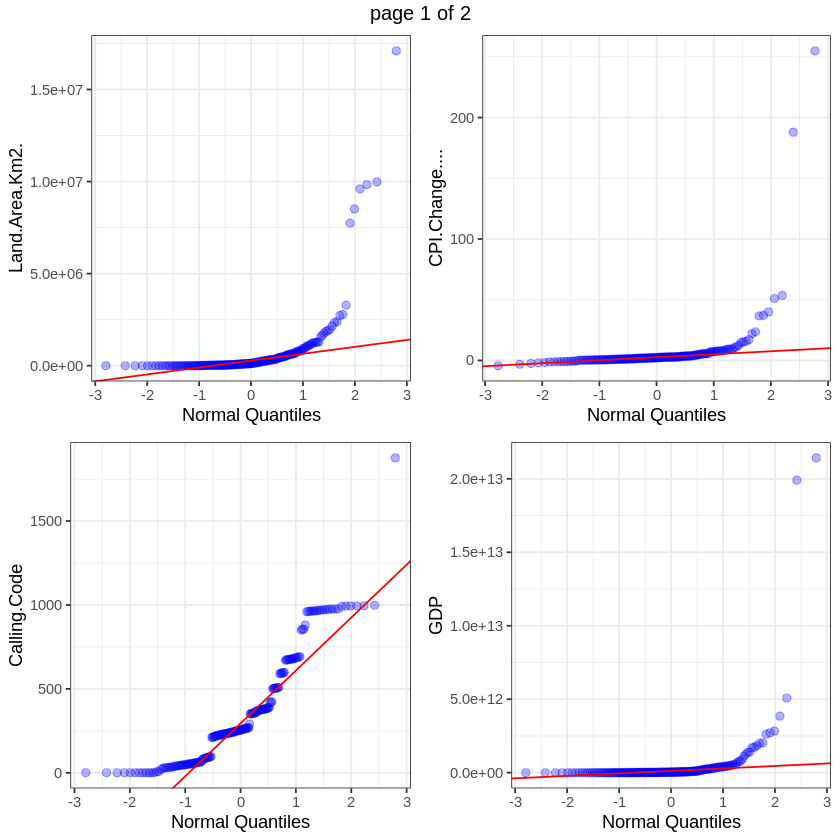

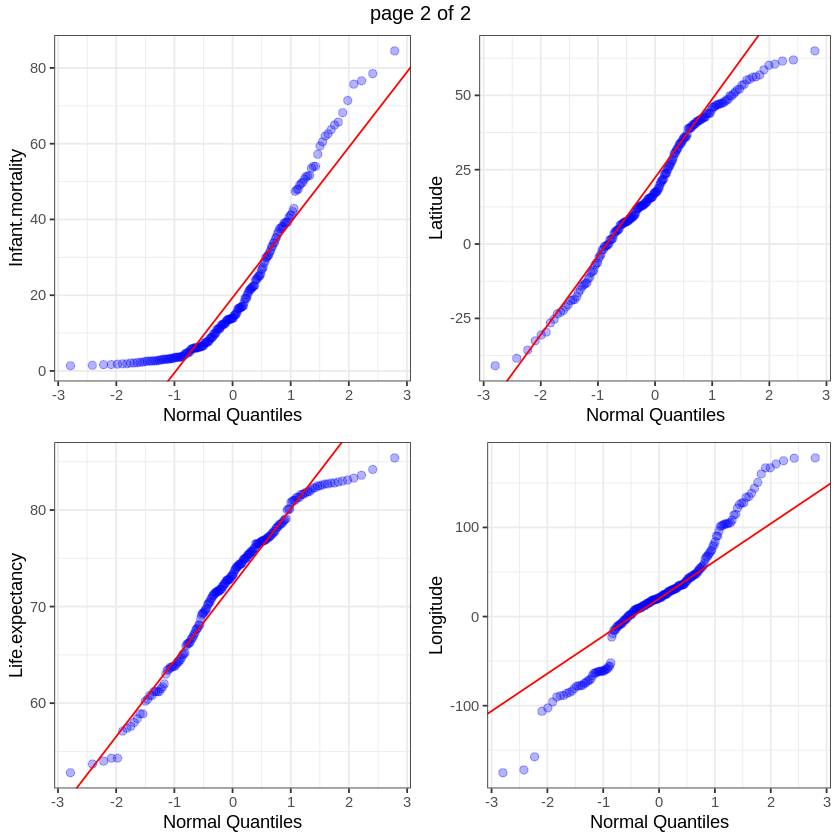

In [48]:
#  ExpOutQQ function automatically scans through each variable and creates normal QQ plot
 plot2 <-ExpOutQQ(clean_data,nlim=3, Page= c(2,2), sample= 8)

 print(plot2)

**Arguments**

**data**	Input dataframe or data.table

**nlim**	numeric variable limit

**fname**	output file name. Output will be generated in PDF format

**Page** 	output pattern. if Page=c(3,2), It will generate 6 plots with 3 rows and 2 columns

**sample**	random number of plots

In [49]:
# Save as QQ Plot as pdf in your work directory
ExpOutQQ(clean_data,nlim=3, fname= "QQ Plot",Page= c(2,2), sample= 8)


$`0`





QQ Plot.pdf is generated at "/content".



In [ ]:
getwd()

In [ ]:
 #ExpReport functions create an  EDA report in HTML
 ExpReport(clean_data,Target=NULL,label="Country",theme="Default",  op_file="Smart_Eda_Report.html", op_dir="/content", sc=NULL, sn=8)


In [25]:
?ExpReport
